In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusting the configuration of plots


#Load the data

df= pd.read_csv('/Users/dimphomola/Downloads/archive/world-happiness-report.csv')

In [2]:
#Let's iew the data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
#Let's check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Country name - 0.0%
year - 0.0%
Life Ladder - 0.0%
Log GDP per capita - 0.018471010774756286%
Social support - 0.006670087224217547%
Healthy life expectancy at birth - 0.028219599794766546%
Freedom to make life choices - 0.016418676244227808%
Generosity - 0.045664443304258596%
Perceptions of corruption - 0.05643919958953309%
Positive affect - 0.011287839917906618%
Negative affect - 0.008209338122113904%


In [4]:
# Fill missing numeric values with median
numeric_cols = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                'Positive affect', 'Negative affect']

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [5]:
#View data types of our columns
df.dtypes
# Check column names and types
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,2013.216008,5.466705,9.370144,0.812705,63.411316,0.742893,-0.001066,0.750222,0.710139,0.268458
std,4.166828,1.115711,1.143437,0.118100,7.409738,0.140945,0.158557,0.181880,0.106501,0.084823
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.478000,0.751000,58.900000,0.649000,-0.106000,0.699000,0.627000,0.207000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.335000,0.905000,68.400000,0.854000,0.085000,0.868000,0.798000,0.319000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [6]:
#check for duplicates
df.duplicated().sum()

0

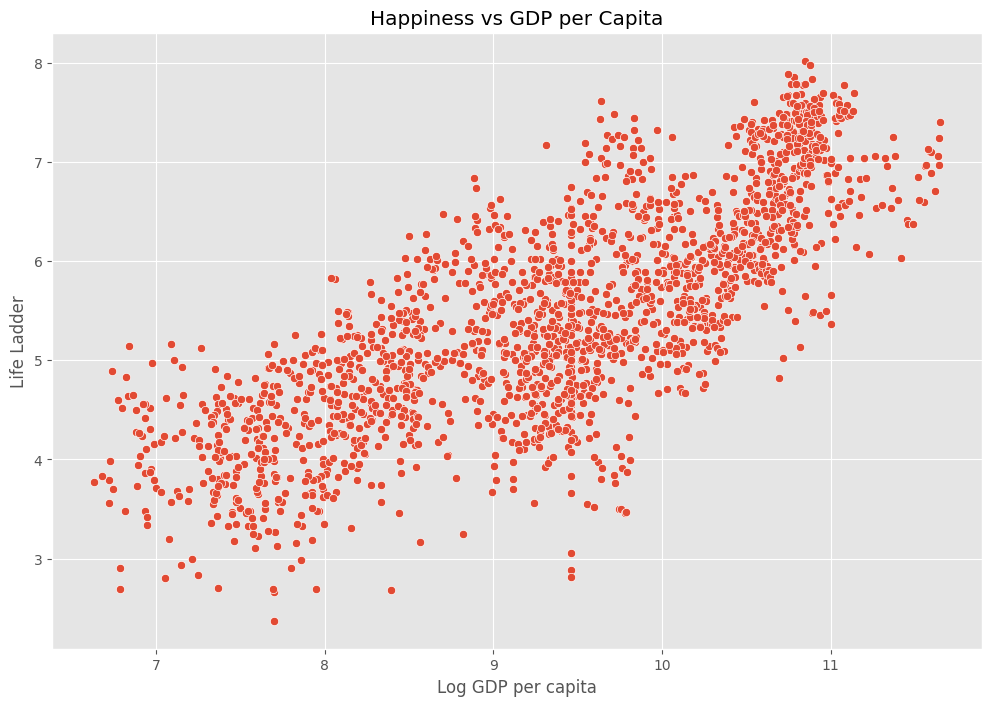

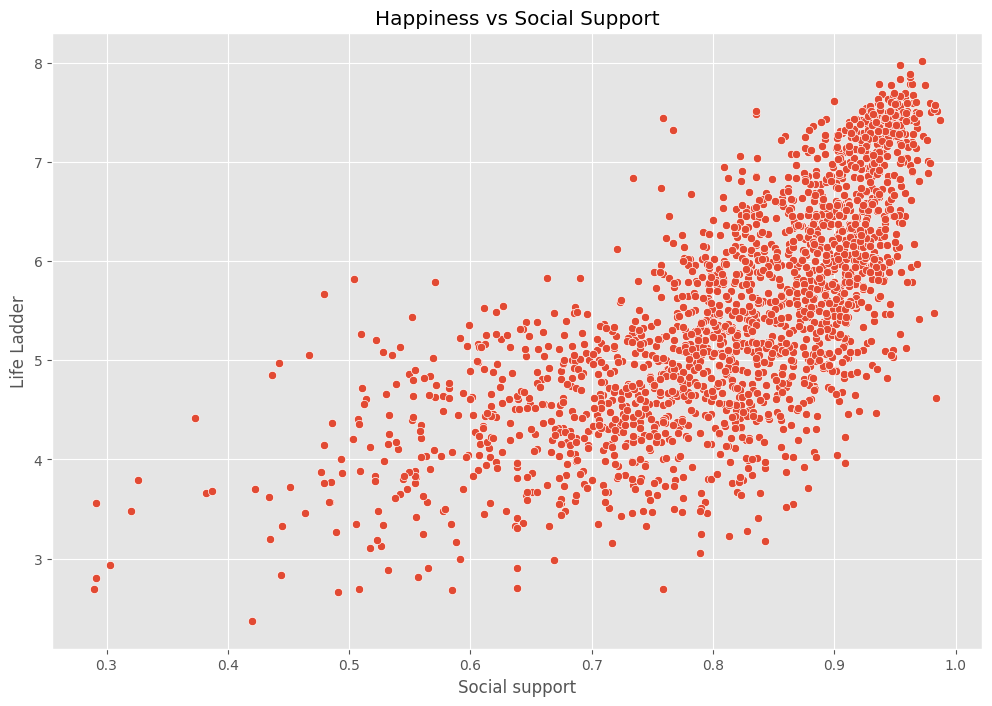

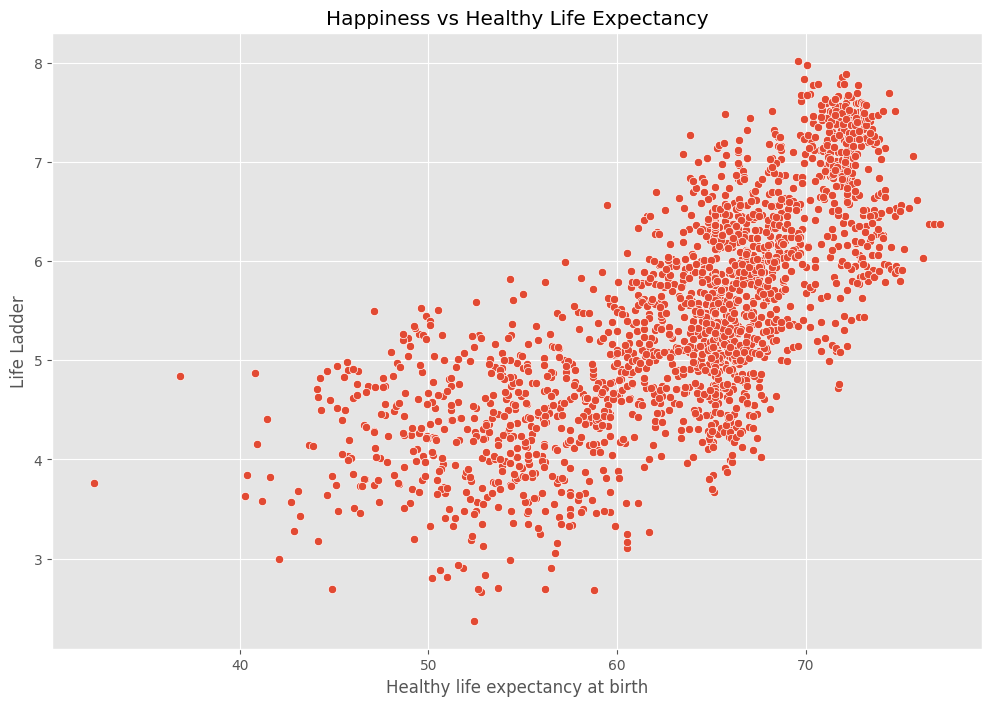

In [7]:
#Based on the results, let's view the scatter plot of the strong correlations.

# Life Ladder (Happiness) vs GDP per capita
sns.scatterplot(data=df, x='Log GDP per capita', y='Life Ladder')
plt.title('Happiness vs GDP per Capita')
plt.show()

# Life Ladder vs Social Support
sns.scatterplot(data=df, x='Social support', y='Life Ladder')
plt.title('Happiness vs Social Support')
plt.show()

# Life Ladder vs Healthy Life Expectancy
sns.scatterplot(data=df, x='Healthy life expectancy at birth', y='Life Ladder')
plt.title('Happiness vs Healthy Life Expectancy')
plt.show()

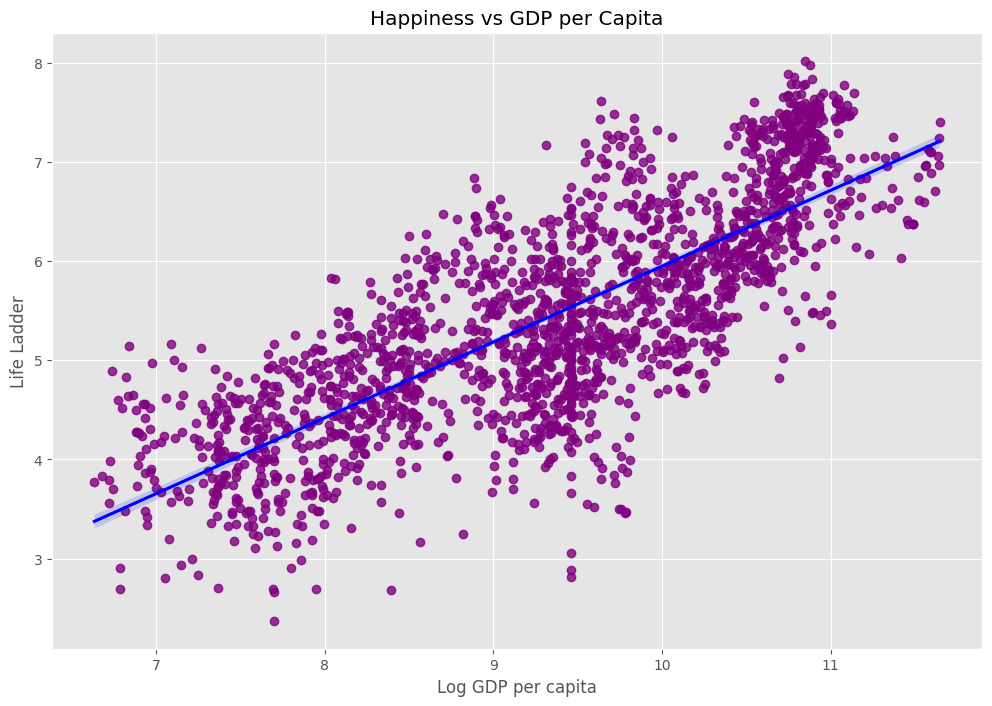

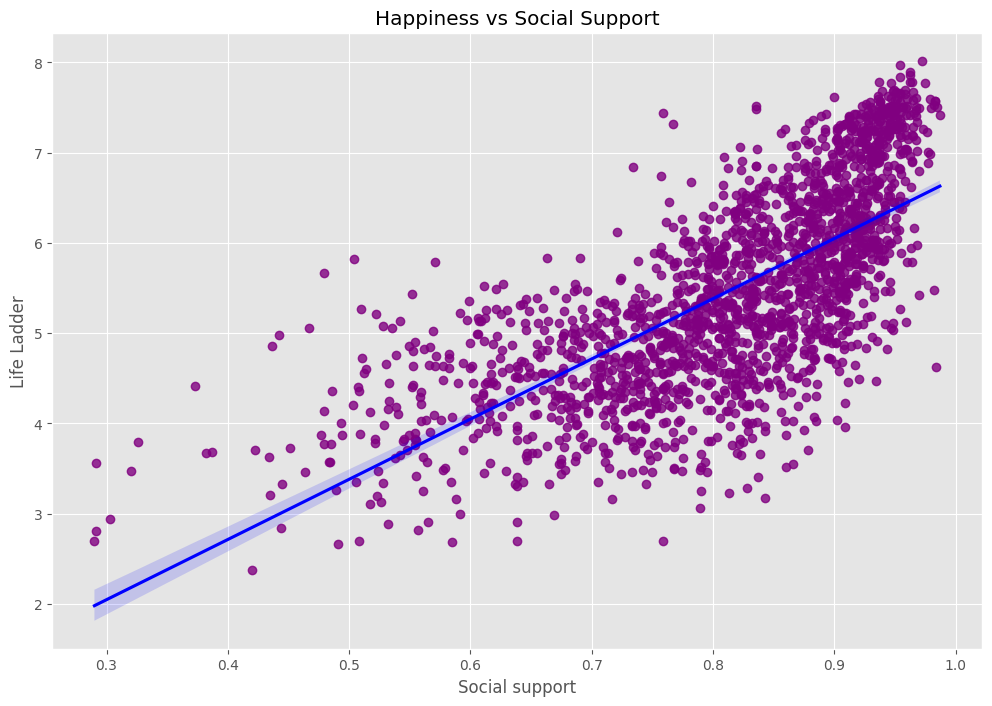

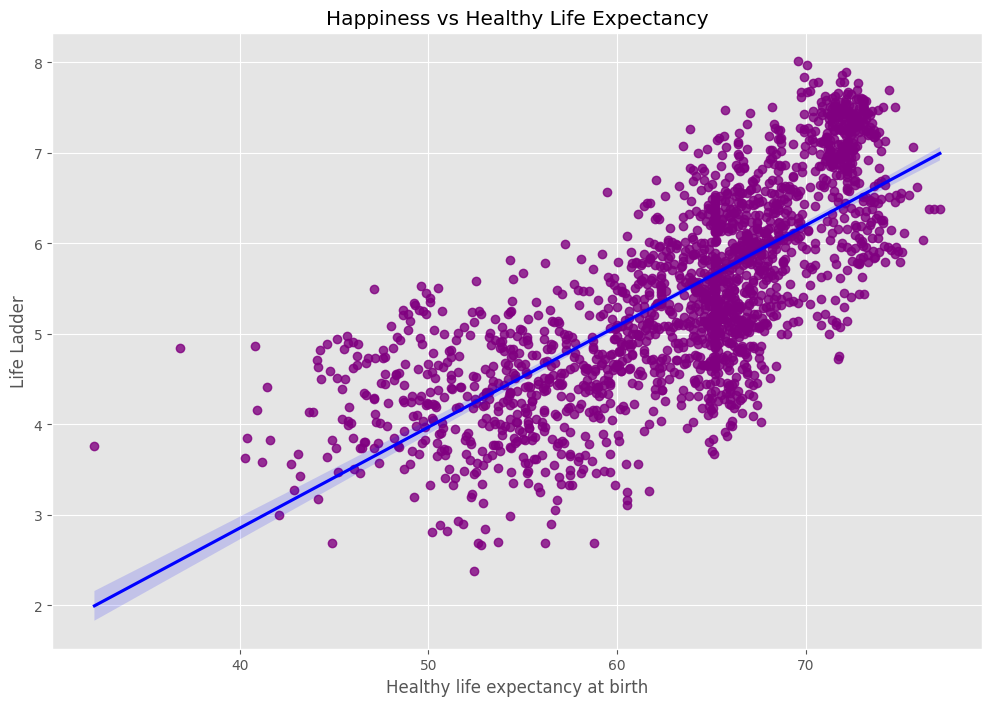

In [8]:
#Based on the results, let's view the scatter plot to include the regression lineof the strong correlations.

# Life Ladder (Happiness) vs GDP per capita
sns.regplot(data=df, x='Log GDP per capita', y='Life Ladder', scatter_kws =  {"color" : 'purple'}, line_kws = {"color" : 'blue'})
plt.title('Happiness vs GDP per Capita')
plt.show()

# Life Ladder vs Social Support
sns.regplot(data=df, x='Social support', y='Life Ladder', scatter_kws =  {"color" : 'purple'}, line_kws = {"color" : 'blue'})
plt.title('Happiness vs Social Support')
plt.show()

# Life Ladder vs Healthy Life Expectancy
sns.regplot(data=df, x='Healthy life expectancy at birth', y='Life Ladder', scatter_kws =  {"color" : 'purple'}, line_kws = {"color" : 'blue'})
plt.title('Happiness vs Healthy Life Expectancy')
plt.show()

In [9]:
#Let's look at the correlation

# combine column names under key features
key_features = ['Log GDP per capita', 'Social support', 
                'Healthy life expectancy at birth', 
                'Freedom to make life choices', 'Generosity', 
                'Perceptions of corruption', 'Life Ladder']

# Compute correlation matrix
corr_matrix = df[key_features].corr()

In [10]:
corr_matrix

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Life Ladder
Log GDP per capita,1.000000,0.682784,0.835302,0.360628,-0.003829,-0.326454,0.783257
Social support,0.682784,1.000000,0.614223,0.409026,0.064236,-0.212068,0.705978
Healthy life expectancy at birth,0.835302,0.614223,1.000000,0.381355,0.021098,-0.308823,0.741064
Freedom to make life choices,0.360628,0.409026,0.381355,1.000000,0.318427,-0.469266,0.525681
Generosity,-0.003829,0.064236,0.021098,0.318427,1.000000,-0.277798,0.184202
Perceptions of corruption,-0.326454,-0.212068,-0.308823,-0.469266,-0.277798,1.000000,-0.415288
Life Ladder,0.783257,0.705978,0.741064,0.525681,0.184202,-0.415288,1.000000


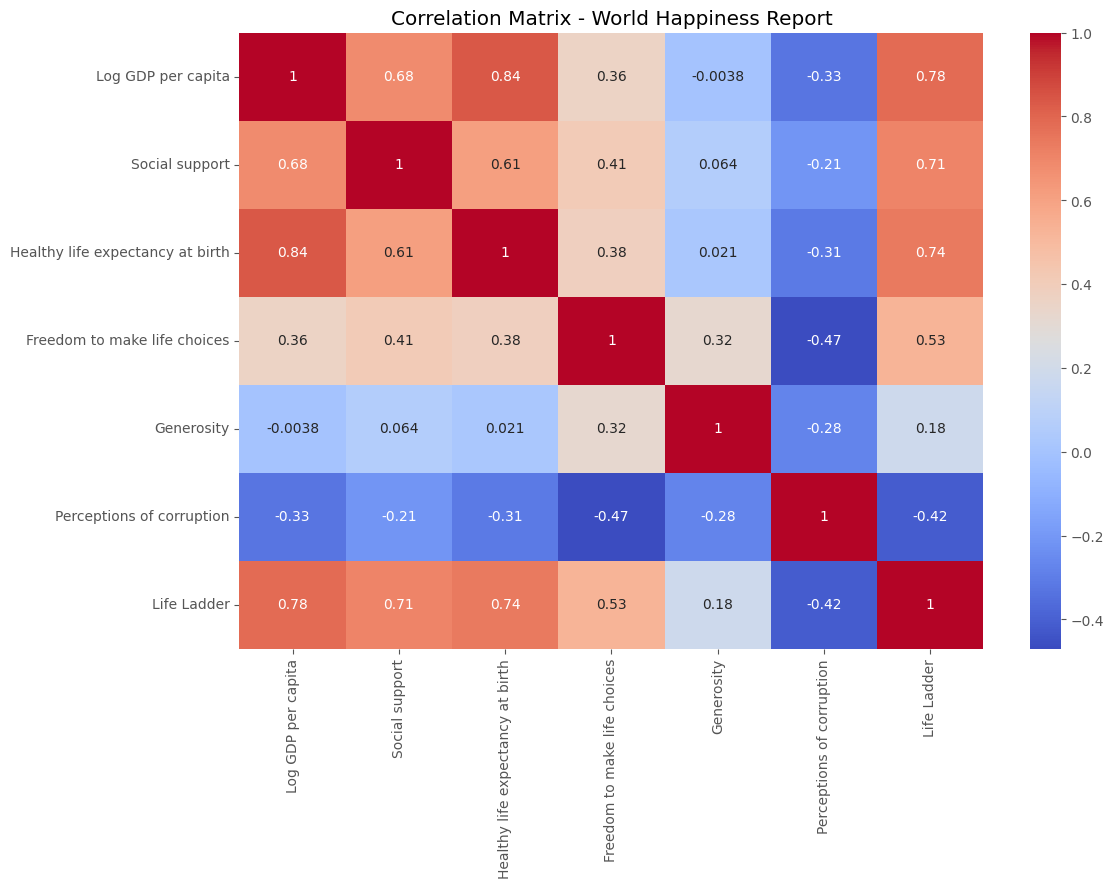

In [11]:
# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - World Happiness Report')
plt.show()

# Correlation Analysis: What Drives Happiness?

## Strongest Positive Correlations with Happiness (Life Ladder)

1. **Wealth (Log GDP per capita) – 0.78**  
   - Wealthier countries are generally happier. Economic prosperity provides better access to opportunities, security, and quality of life.  

2. **Health (Healthy life expectancy) – 0.74**  
   - Countries where people live longer, healthier lives also tend to score higher on happiness. Health is a major foundation of well-being.  

3. **Social Support – 0.71**  
   - Strong support systems and communities are closely linked to happiness. Feeling supported and connected improves life satisfaction.  

4. **Freedom to Make Life Choices – 0.53**  
   - Freedom contributes to happiness, though not as strongly as wealth, health, or social support. Still, being able to make life decisions matters.  

5. **Generosity – moderate correlation**  
   - While generosity shows some link to happiness, it is not as decisive as structural factors like wealth, health, or governance.  

6. **Perceptions of Corruption – negative correlation**  
   - Countries with higher corruption levels tend to be less happy, showing that governance and trust in institutions are important.  


In [12]:
#Look at countries 
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [13]:
#Let's see the top 10 and bottom 10 countries

# Average happiness score per country
country_happiness = df.groupby("Country name")["Life Ladder"].mean().reset_index()

# Sort by happiness
top_10 = country_happiness.sort_values(by="Life Ladder", ascending=False).head(10)
bottom_10 = country_happiness.sort_values(by="Life Ladder", ascending=True).head(10)

print("Top 10 Happiest Countries:\n", top_10)
print("\nBottom 10 Least Happy Countries:\n", bottom_10)

Top 10 Happiest Countries:
     Country name  Life Ladder
39       Denmark     7.680400
47       Finland     7.597154
143  Switzerland     7.548300
111       Norway     7.512400
104  Netherlands     7.466286
62       Iceland     7.446500
25        Canada     7.376333
142       Sweden     7.369467
105  New Zealand     7.310286
6      Australia     7.282071

Bottom 10 Least Happy Countries:
                  Country name  Life Ladder
136               South Sudan     3.402000
26   Central African Republic     3.515000
22                    Burundi     3.548200
149                      Togo     3.555000
0                 Afghanistan     3.594667
124                    Rwanda     3.654417
147                  Tanzania     3.697333
165                  Zimbabwe     3.882600
163                     Yemen     3.912250
31                    Comoros     3.944000


In [14]:
#Let's view the data's avarage

# Average of factors for top and bottom countries
top_factors = df[df["Country name"].isin(top_10["Country name"])][key_features].mean()
bottom_factors = df[df["Country name"].isin(bottom_10["Country name"])][key_features].mean()

# Combine into comparison dataframe
comparison = pd.DataFrame({"Top 10": top_factors, "Bottom 10": bottom_factors})

In [15]:
comparison

,Top 10,Bottom 10
Log GDP per capita,10.826875,7.724053
Social support,0.945160,0.635032
Healthy life expectancy at birth,72.215000,52.898947
Freedom to make life choices,0.929922,0.632021
Generosity,0.176762,-0.001574
Perceptions of corruption,0.347297,0.726063
Life Ladder,7.454344,3.707558


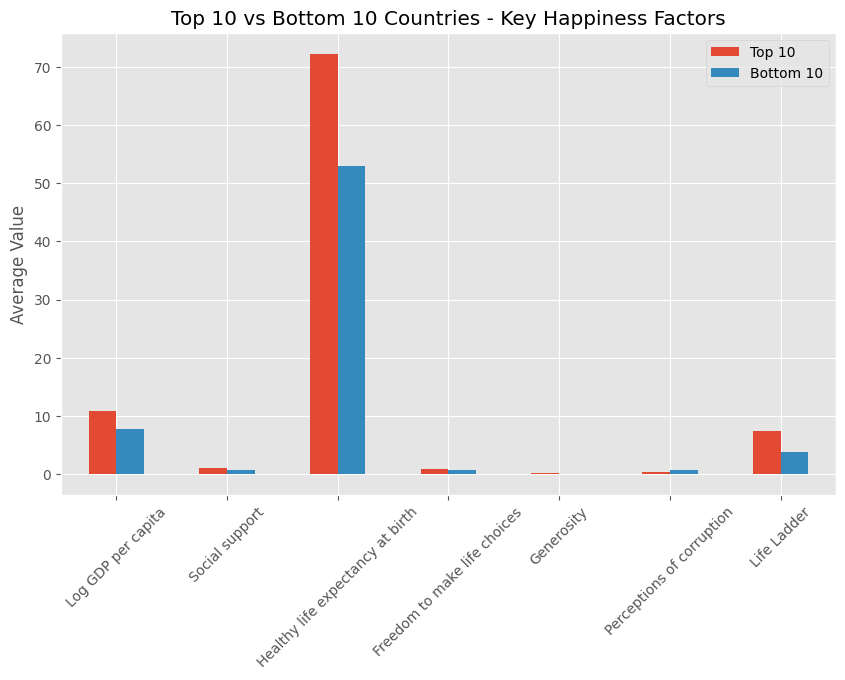

In [16]:
#Plot the data
comparison.plot(kind="bar", figsize=(10,6))
plt.title("Top 10 vs Bottom 10 Countries - Key Happiness Factors")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

# World Happiness Analysis

## Insights from Top 10 vs Bottom 10 Countries

1. **Wealth (Log GDP per capita)**  
   - Top 10: **10.83** vs Bottom 10: **7.72**  
   - The happiest countries tend to be a lot wealthier, which gives them better opportunities and living standards.  

2. **Social Support**  
   - Top 10: **0.95** vs Bottom 10: **0.64**  
   - Having strong support systems — whether from family, friends, or institutions — plays a big role in people’s happiness.  

3. **Healthy Life Expectancy**  
   - Top 10: **72.2 years** vs Bottom 10: **52.9 years**  
   - Living longer, healthier lives naturally makes people more satisfied.  

4. **Freedom to Make Life Choices**  
   - Top 10: **0.93** vs Bottom 10: **0.63**  
   - People are happier when they feel free to make decisions about their own lives.  

5. **Generosity**  
   - Top 10: **0.18** vs Bottom 10: **~0**  
   - While generosity shows up in the data, it doesn’t weigh as heavily as wealth or freedom.  

6. **Perceptions of Corruption**  
   - Top 10: **0.35** vs Bottom 10: **0.73**  
   - Less corruption is strongly linked to higher happiness.  

7. **Overall Happiness (Life Ladder)**  
   - Top 10: **7.45** vs Bottom 10: **3.71**  
   - There’s almost a two-times difference in happiness. The happiest countries benefit from a cycle of wealth, health, freedom, and trust, while the least happy ones are held back by poverty, poor health, and corruption.   

---

## Correlation + Top/Bottom Country Analysis  

Both the **correlation results** and the **Top 10 vs Bottom 10 comparison** tell the same story:  

- The happiest countries consistently score higher in **wealth, health, social support, and freedom**, and have **lower corruption**.  
- The least happy countries struggle with **poverty, poor health outcomes, weaker social networks, and higher corruption**, which drags down their well-being.  
- **Generosity** is present but doesn’t explain the big differences between the happiest and least happy nations.  

---

## Key Takeaway  
Happiness is shaped by more than individual feelings — it depends heavily on **economic prosperity, strong institutions, good health, and supportive communities**. For policymakers, this highlights the need to invest not just in growth, but in **healthcare, social trust, and governance** to improve well-being at a national level.  
